In [36]:
#importing all the modules needed for the project
import gym
import numpy as np
import math, random, time
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt

### Initialising Gym environment

In [37]:
env = gym.make('CartPole-v0')

### Random Policy

In [38]:
total_epochs = 0

episodes = 1000 ##the number of episode you want to run the environment

all_rewards = []##For calculating all the rewards
episode_reward = 0##For calculating all the rewards

for i in range(episodes): ##Creating a loop that runs though all the episodes
    state = env.reset() ##Resets the environment and returns a random initial state.
    epochs, reward = 0, 0
    done = False
    episode_reward = 0

    while not done: 
        action = env.action_space.sample() ##taking action through the action space.
        state, reward, done, info = env.step(action)
        episode_reward+= reward ##storing reward for each episode
        epochs += 1 ##number of passes of the entire training dataset
    total_epochs += epochs
    all_rewards.append(episode_reward) ##storing rewards for all episodes

avg_time = total_epochs / episodes ## calculating avg time
##Printing the results.
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {avg_time}")

Results after 1000 episodes:
Average timesteps per episode: 22.938


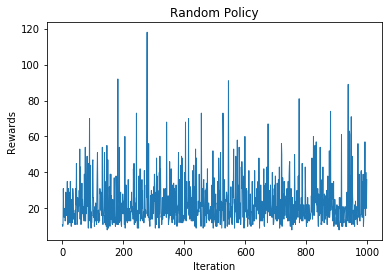

In [39]:
#plotting the results
plt.plot(all_rewards, linewidth = 1)
plt.title("Random Policy")
plt.ylabel('Rewards')
plt.xlabel('Iteration')
plt.show()

### Q learning Training and Implementation

In [40]:
'''Creating buckets of cart position, cart velocity, pole angle and tip pole velocity
 with upper and lower limits to discretize the continuous state'''
buckets = 4
buckets = [
np.linspace(-2.4, 2.4, buckets + 1)[1:-1],
np.linspace(-3.0, 3.0, buckets + 1)[1:-1],
np.linspace(-0.5, 0.5, buckets + 1)[1:-1],
np.linspace(-2.0, 2.0, buckets + 1)[1:-1]
        ]

num_actions = 2
max_buckets = max(len(buckets) for bucket in buckets)
num_states = (max_buckets + 1) ** len(buckets)
q_table = np.zeros(shape=(num_states, num_actions)) ## Creating q table

In [41]:
#Function for discretizing states
def discretize(observation):
    state = sum(
        np.digitize(x=feature, bins=buckets[i]) * ((max_buckets + 1) ** i)
        for i, feature in enumerate(observation)
    )
    return state

In [52]:
%%time
#Q learning Training
alpha = 0.2
gamma = 0.5
epsilon = 0.1

all_epochs = []
episode_rewards = 0
q_rewards = []
episodes = 10000

for i in range(episodes):##Creating a loop that runs though all the episodes
    state = discretize(env.reset())##Resets the environment
    epochs, reward = 0, 0
    episode_rewards = 0
    done = False

    while not done:
        '''explores the action space by evaluating epsilon value with a random number,
        if value is less than epsilon value, it explors or else use the q table to take action'''
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        '''updating the q table with max rewards'''
        next_state, reward, done, info = env.step(action) 
        next_state = discretize(next_state)
        episode_rewards += reward
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        state = next_state
        epochs += 1
    ###storing all the rewards for each episode
    q_rewards.append(episode_rewards)

   
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 9900
Training finished.

Wall time: 7.31 s


In [48]:
'''Implementing q learning algorithm and use q table to get maximum rewards and then giving output of results.'''
total_epochs = 0
episodes = 100

for i in range(episodes):
    state = env.reset()
    state = discretize(state)
    epochs, reward= 0, 0

    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        state = discretize(state)
        epochs += 1
    total_epochs += epochs

q_avg_time = total_epochs / episodes

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {q_avg_time}")

Results after 100 episodes:
Average timesteps per episode: 12.41


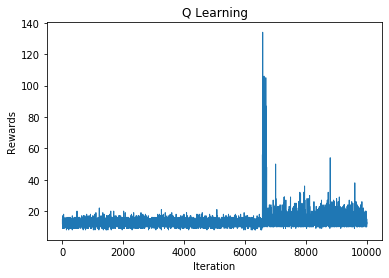

In [53]:
#plotting the results
plt.plot(q_rewards, linewidth = 1)
plt.title("Q Learning")
plt.ylabel('Rewards')
plt.xlabel('Iteration')
plt.show()